In [9]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [4]:
# загружаем данные
df = pd.read_csv('data/Pokemon.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


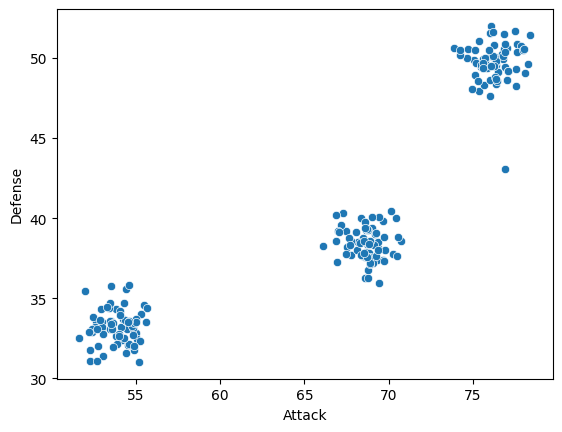

In [6]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

# визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense);

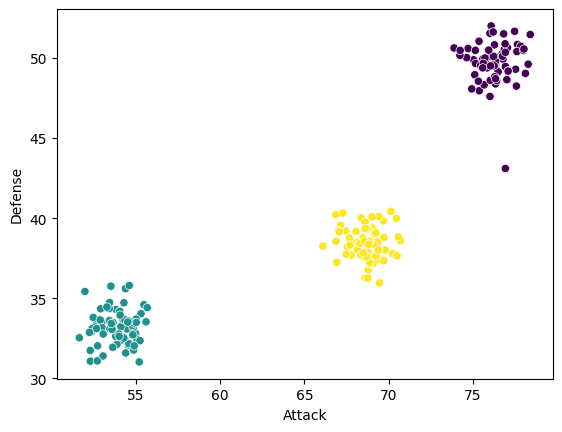

In [7]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions);

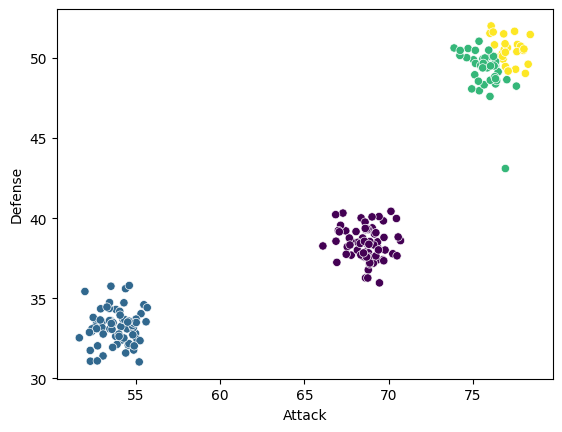

In [8]:
# инициализируем алгоритм k-means с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4);

>  Для этого можно использовать несколько способов: **метод локтя** (elbow plot), **статистику разрыва** (Gap Statistic Method), **коэффициент силуэта** (Average Silhouette Method). Мы рассмотрим метод локтя и коэффициент силуэта.

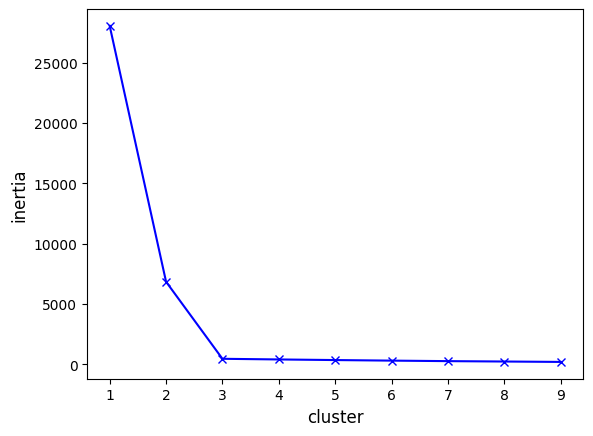

In [12]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42, n_init=10)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-');

In [13]:
# импортируем метрику силуэта для Коэффициента силуэта
from sklearn.metrics import silhouette_score

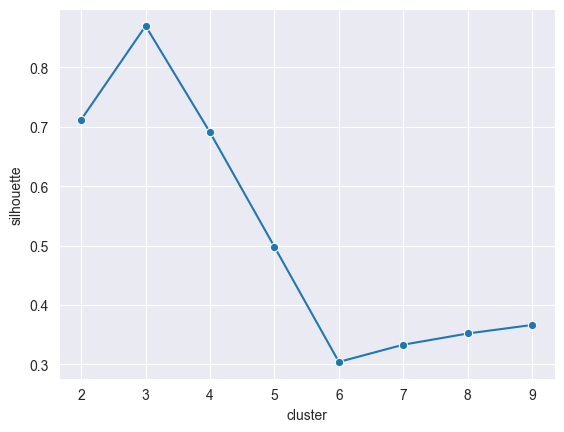

In [14]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o");

In [15]:
X_2 = pd.read_csv('data/values_from_the_instrument.csv')

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278
...,...,...
995,64.147007,59.058766
996,48.973928,67.454876
997,62.605739,58.633415
998,47.122895,67.308920


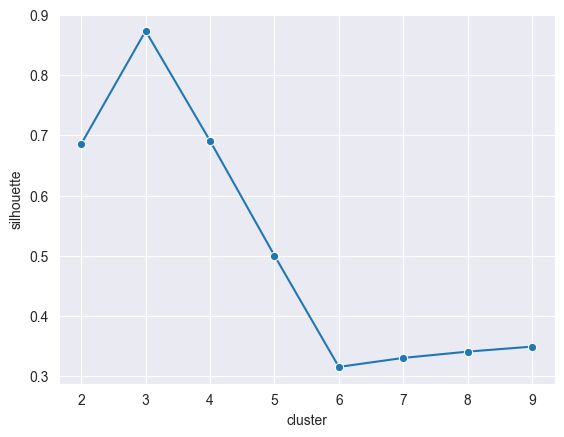

In [17]:
silhouette_res_2 = {"silhouette": [], "cluster": []}
for cluster_num in range(2, 10):
    silhouette_res_2["silhouette"].append(get_silhouette(cluster_num, X_2))
    silhouette_res_2["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df_2 = pd.DataFrame(silhouette_res_2)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df_2, x="cluster", y="silhouette", marker= "o");

Метрики

ОДНОРОДНОСТЬ КЛАСТЕРОВ (HOMOGENEITY SCORE)

Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру.

In [19]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))

1.0
1.0


In [20]:
# передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0


ПОЛНОТА КЛАСТЕРА (COMPLETENESS SCORE)

Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

In [22]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

In [24]:
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# посчитаем, насколько полными получились кластеры с покемонами
print(round(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4), 2))

1.0
0.83


V-МЕРА (V-MEASURE)

Эта метрика — комбинация метрик полноты и однородности.  
Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

In [25]:
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

In [26]:
# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(round(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4), 2))

1.0
0.91


ИНДЕКС РЭНДА

Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (number of agreeing pairs), среди предсказанных и размеченных данных. По сути, данная метрика подсчитывает, для какой доли объектов датасета мы правильно определили кластер.

In [27]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score

In [28]:
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])
1.0

1.0

In [29]:
print(round(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]), 2))

0.74


ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ

Принцип иерархической кластеризации основан на построении дерева (иерархии) вложенных кластеров.
При иерархической кластеризации выделяют два подхода: агломеративный и дивизионный. В первом случае кластеры образуются снизу вверх, т. е. при объединении кластеров, а во втором — сверху вниз, в ходе деления крупных кластеров

In [30]:
from sklearn.cluster import AgglomerativeClustering

linkage — метод определения расстояния между кластерами, которое мы рассматривали выше.  
Можно выбрать single, ward, average, complete; по умолчанию используется ward.

In [ ]:
# создадим объект агломеративной агрегации
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
# обучим модель
agglomerative_clustering.fit(X)
# получим метки класса для данных
agglomerative_clustering.labels_

EM-алгоритмы кластеризации

In [31]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

In [32]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)
# обучаем модель 
gm_clustering.fit(X)
# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

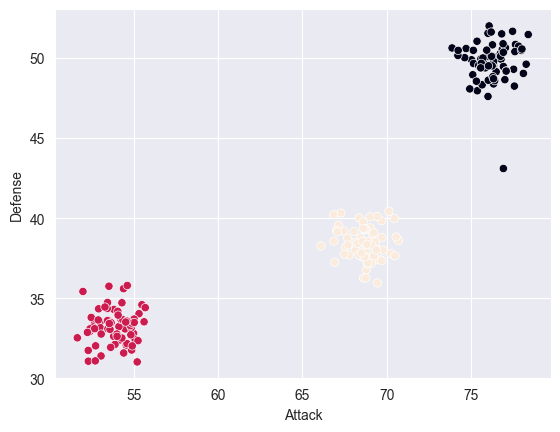

In [36]:
#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=gm_prediction);

In [33]:
from sklearn.mixture import GaussianMixture
help(GaussianMixture)

Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
 |  GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
 |  
 |  Gaussian Mixture.
 |  
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |  
 |  Read more in the :ref:`User Guide <gmm>`.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=1
 |      The number of mixture components.
 |  
 |  covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'
 |      String describing the type of covariance parameters to use.
 |      Must be one of:
 |  
 |      - 'full': each component has 

In [37]:
housing = pd.read_csv('data/housing.csv')

In [38]:
housing

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806
...,...,...
1350,12.580032,10.122039
1351,12.488949,9.934954
1352,10.693618,12.083653
1353,12.455530,10.304081


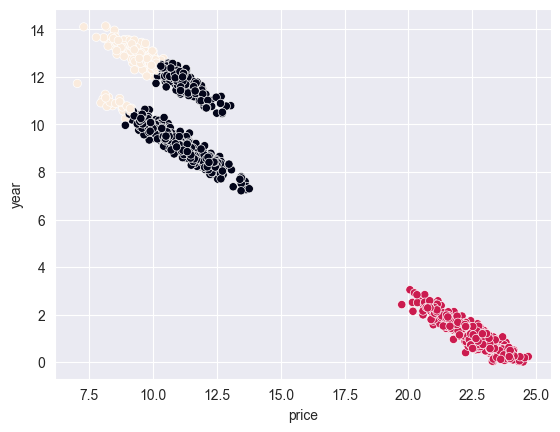

In [47]:
k_means = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
k_means.fit(housing)

# предскажем, к какому кластеру принадлежат покемоны 
pred = k_means.predict(housing)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
pred = k_means.labels_

# сохраним предсказания в датафрейм
housing['Clusters_k3'] = pred

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=housing.price, y=housing.year, c=pred);

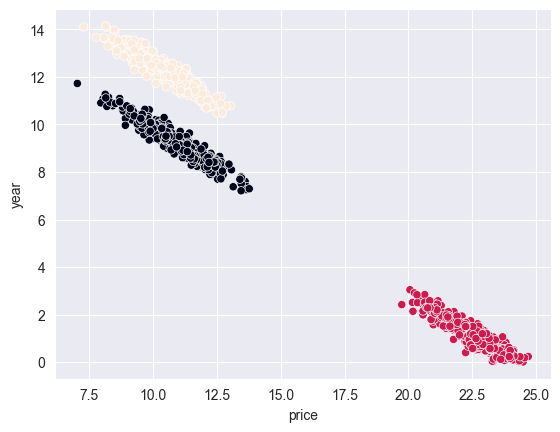

In [43]:
gm_cluster = GaussianMixture(n_components=3, random_state=42)
# обучаем модель 
gm_cluster.fit(housing)
# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_pred = gm_cluster.predict(housing)
sns.scatterplot(x=housing.price, y=housing.year, c=gm_pred);

Спектральная кластеризация

In [48]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering
# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)
spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

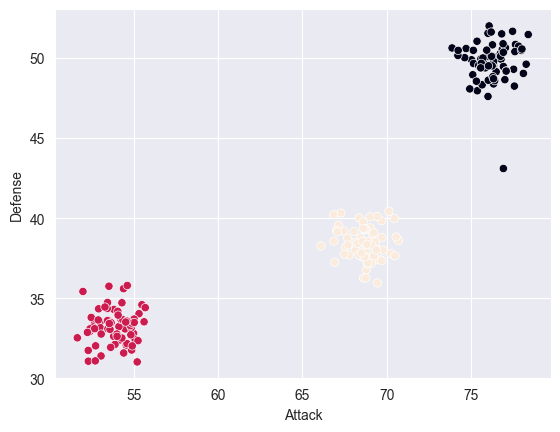

In [49]:
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions);

Кластеризация на основе плотности

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

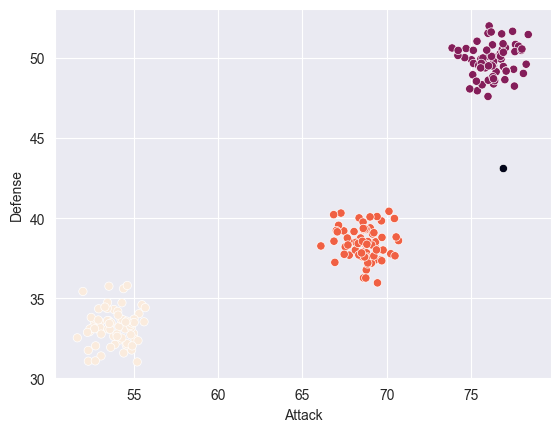

In [50]:
# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

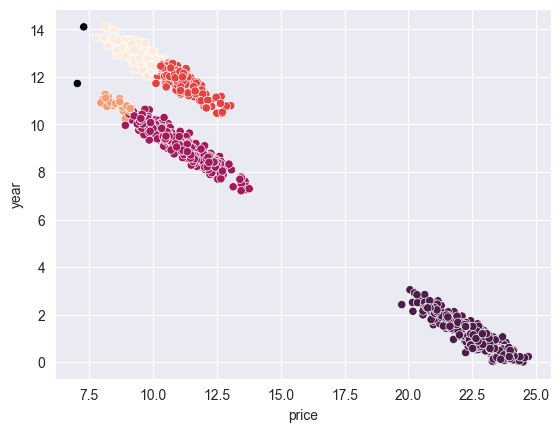

In [59]:
# Запускаем кластеризацию на наших данных
clust = DBSCAN(eps = 0.5, min_samples = 5).fit(housing)

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=housing.price, y=housing.year, c=clust.labels_);